In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Weight,Height
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.drop('Gender', axis=1, inplace=True)

In [4]:
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

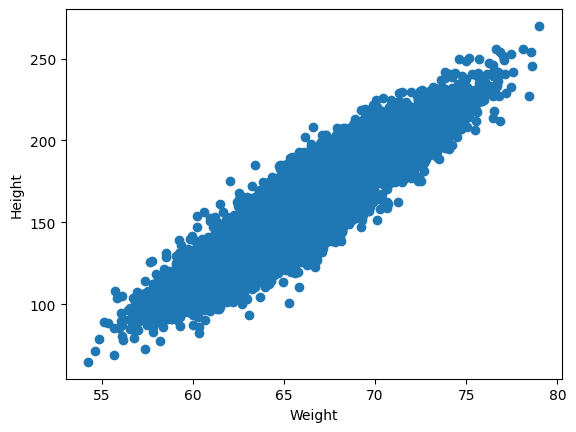

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [13]:
## Divide out dataset into dependent and indepdent features.
X = df[['Weight']]
Y = df['Height']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.20)

In [15]:
X.shape

(10000, 1)

In [16]:
X_train.shape

(8000, 1)

In [17]:
## In linear regression standardization needs to be applied.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

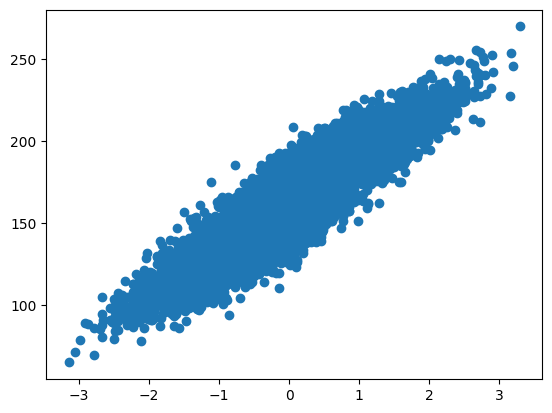

In [22]:
## 
plt.scatter(X_train,Y_train)

In [24]:
## Train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [27]:
print("The Slope or Coefficient of the Weight is ", lin_reg.coef_)
print("Intercept ",lin_reg.intercept_)

The Slope or Coefficient of the Weight is  [29.61903439]
Intercept  161.3267623130613


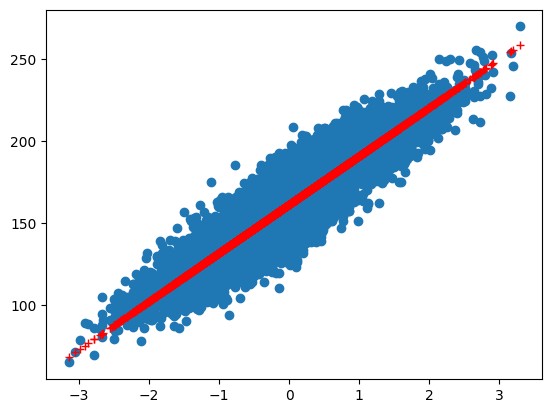

In [29]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,lin_reg.predict(X_train),'r+')

In [30]:
Y_pred_test = lin_reg.predict(X_test)

In [32]:
Y_pred_test, Y_test

(array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
        166.78470522, 101.81227499], shape=(2000,)),
 6252    173.115813
 4684    195.162042
 1731    170.217451
 4742    215.049660
 4521    182.721452
            ...    
 6412    142.067438
 8285    119.967881
 7853    125.179380
 1095    187.573494
 6929    102.469087
 Name: Height, Length: 2000, dtype: float64)

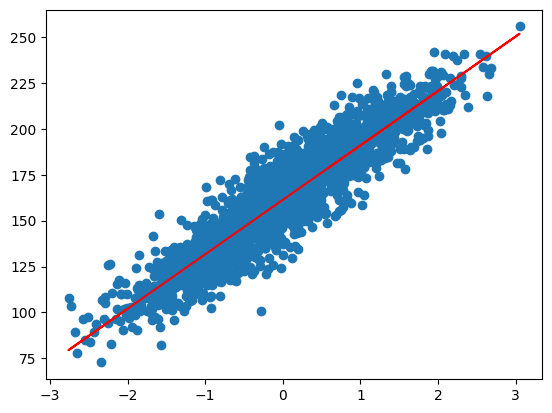

In [36]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred_test, 'r')

In [38]:
## Pefrformance Metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_squared_error
score = r2_score(Y_test,Y_pred_test)
mae = mean_absolute_error(Y_test,Y_pred_test)
mse = mean_squared_error(Y_test,Y_pred_test)
rmse = root_mean_squared_error(Y_test,Y_pred_test)
print("Mean Absoute Error : ", mae)
print("Mean Squared Error : ", mse)
print("Root Mean Squred Error : ", rmse)
print("r2 Score", score)

Mean Absoute Error :  9.691933801884568
Mean Squared Error :  149.00350418448116
Root Mean Squred Error :  12.206699151878905
r2 Score 0.85773177770385


In [39]:
lin_reg

LinearRegression()

In [41]:
## Prediction for new data point
scaled_weight = scaler.transform([[67]])

/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
scaled_weight

array([[0.16650957]])

In [47]:
print("The Height predition for new weight is : " , lin_reg.predict(scaled_weight))

The Height predition for new weight is :  [166.25861496]


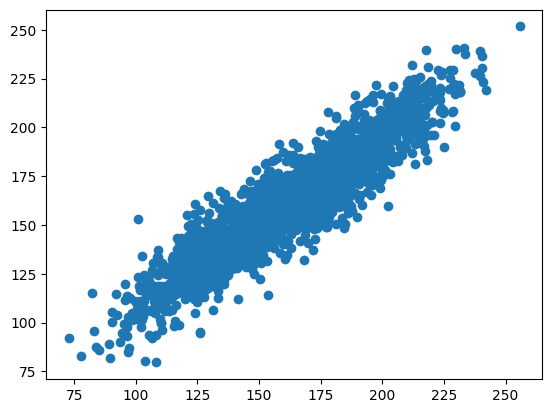

In [48]:
## Plot the scatter plot of y_test and y_pred_test
plt.scatter(Y_test, Y_pred_test)

In [49]:
## Residuals
residuals = Y_test - Y_pred_test
print(residuals)

6252    -6.138178
4684    14.813559
1731     8.594563
4742    10.824353
4521    16.132390
          ...    
6412   -14.552671
8285     1.987668
7853    -4.023503
1095    20.788789
6929     0.656812
Name: Height, Length: 2000, dtype: float64


/var/folders/37/lfcwt6tj0fg_c56ytzq6yrv80000gn/T/ipykernel_84233/2998397011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

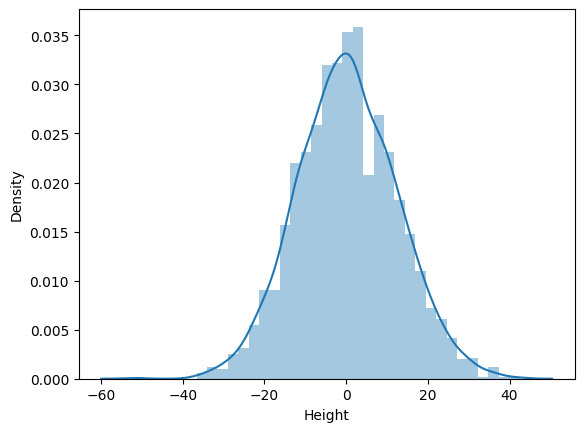

In [50]:
sns.distplot(residuals, kde=True)

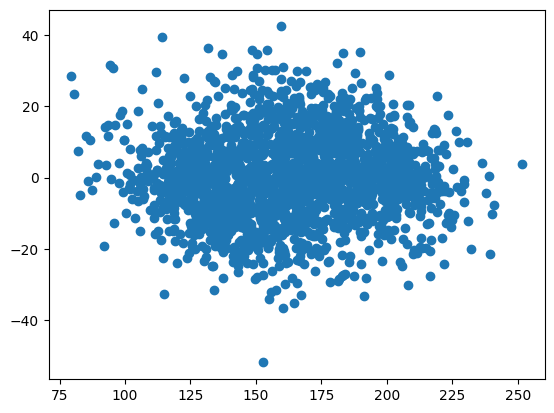

In [ ]:
## scatter plot with respect to y_pred and residuals 
plt.scatter(Y_pred_test, residuals)
## uniform distiribution then this is very good model.

In [ ]:
## pickling the model.